In [160]:
#Importing Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [161]:
#Importing data
data=pd.read_csv("C:/Users/DC/Downloads/Covid19.csv")
df=pd.DataFrame(data)
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [163]:
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [164]:
#checking null values
df.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [165]:
df.isnull().mean()

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
                                                           ...   
HCO3 (arterial blood gas analysis)                       0.995216
pO2 (arterial blood gas analysis)                        0.995216
Arteiral Fio2                                            0.996456
Phosphor                                                 0.996456
ctO2 (arterial blood gas analysis)                       0.995216
Length: 111, dtype: float64

Many columns have null values covering more than 80% of the values in that column. Imputing can seriously distort the data and the modelling. Thus they need to be removed.

In [166]:
df=df[df.columns[df.isnull().mean()<0.8]]

In [167]:
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2'],
      dtype='object')

In [168]:
df.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Respiratory Syncytial Virus                              4290
Influenza A                                              4290
Influenza B                                              4290
Parainfluenza 1                                          4292
CoronavirusNL63                                          4292
Rhinovirus/Enterovirus                                   4292
Coronavirus HKU1                                         4292
Parainfluenza 3                                          4292
Chlamydophila pneumoniae                                 4292
Adenovirus                                               4292
Parainfl

In [169]:
df.dtypes

Patient ID                                               object
Patient age quantile                                      int64
SARS-Cov-2 exam result                                   object
Patient addmited to regular ward (1=yes, 0=no)            int64
Patient addmited to semi-intensive unit (1=yes, 0=no)     int64
Patient addmited to intensive care unit (1=yes, 0=no)     int64
Respiratory Syncytial Virus                              object
Influenza A                                              object
Influenza B                                              object
Parainfluenza 1                                          object
CoronavirusNL63                                          object
Rhinovirus/Enterovirus                                   object
Coronavirus HKU1                                         object
Parainfluenza 3                                          object
Chlamydophila pneumoniae                                 object
Adenovirus                              

In [170]:
#Imputation
for i in df.columns:
    if df[i].dtypes=='O':
        df[i].fillna('unknown',inplace=True)

In [171]:
df.isnull().sum()

Patient ID                                               0
Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
Patient addmited to intensive care unit (1=yes, 0=no)    0
Respiratory Syncytial Virus                              0
Influenza A                                              0
Influenza B                                              0
Parainfluenza 1                                          0
CoronavirusNL63                                          0
Rhinovirus/Enterovirus                                   0
Coronavirus HKU1                                         0
Parainfluenza 3                                          0
Chlamydophila pneumoniae                                 0
Adenovirus                                               0
Parainfluenza 4                                         

In [172]:
#LabelEncoder to change object variables to int
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='O':
        df[i]=le.fit_transform(df[i].astype(str))
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,1588,13,0,0,0,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
1,451,17,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2,3669,8,0,0,0,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
3,5457,5,0,0,0,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
4,4843,15,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3892,3,1,0,0,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
5640,1860,17,0,0,0,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
5641,2125,4,0,0,0,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
5642,4316,10,0,0,0,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1


In [173]:
df['Influenza A'].value_counts()

2    4290
1    1336
0      18
Name: Influenza A, dtype: int64

In [174]:
#Since patient ID is irrelevant to modelling, it is dropped
df.drop(['Patient ID'],axis=1,inplace=True)

In [175]:
df=df.rename(columns={'Patient age quantile':'Age_quantile','SARS-Cov-2 exam result':'Covid19','Patient addmited to regular ward (1=yes, 0=no)':'Regular_ward','Patient addmited to semi-intensive unit (1=yes, 0=no)':'Semi_intensive_unit','Patient addmited to intensive care unit (1=yes, 0=no)':'Intensive_care_unit'})

In [176]:
df

,Age_quantile,Covid19,Regular_ward,Semi_intensive_unit,Intensive_care_unit,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
1,17,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2,8,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
3,5,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
4,15,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
5640,17,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
5641,4,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
5642,10,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1


In [177]:
df.describe()

,Age_quantile,Covid19,Regular_ward,Semi_intensive_unit,Intensive_care_unit,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,...,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000
mean,9.318391,0.098866,0.013997,0.008859,0.007264,1.750886,1.756910,1.746456,1.759922,1.752481,...,1.758682,1.758859,1.758150,1.757087,1.758859,1.759036,1.743090,1.760099,1.757973,0.760454
std,5.777903,0.298509,0.117489,0.093713,0.084929,0.453342,0.436359,0.465385,0.428411,0.449706,...,0.432042,0.431525,0.433588,0.436661,0.431525,0.431008,0.475052,0.427890,0.434102,0.426844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,9.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,14.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,19.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


Since most of the values were imputed, the actual values may be removed by outlier treatment. So it is avoided.

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

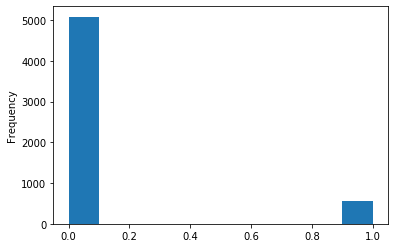

In [179]:
plt.figure()
df['Covid19'].plot(kind='hist')

Majority of the subjects are covid negetive

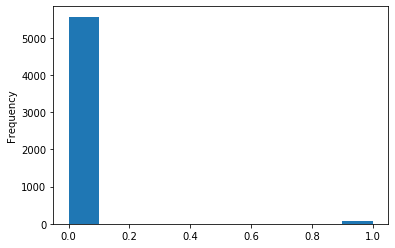

In [180]:
plt.figure()
df['Regular_ward'].plot(kind='hist')

Majority of the subjects have not been to regular ward

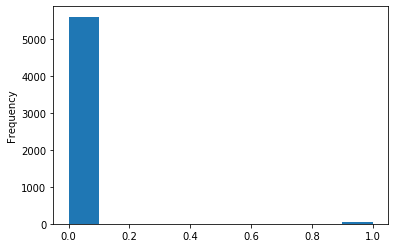

In [181]:
plt.figure()
df['Semi_intensive_unit'].plot(kind='hist')

Majority of the subjects have not been to semi intensive unit

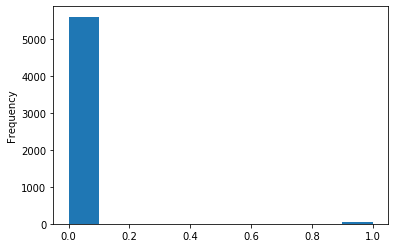

In [182]:
plt.figure()
df['Intensive_care_unit'].plot(kind='hist')

Majority of the subjects have not been to intensive care unit

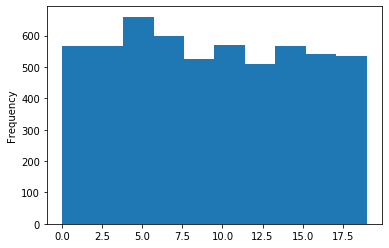

In [183]:
plt.figure()
df['Age_quantile'].plot(kind='hist')

Age quantile=4 (approx) has the highest frequency

<Figure size 432x288 with 0 Axes>

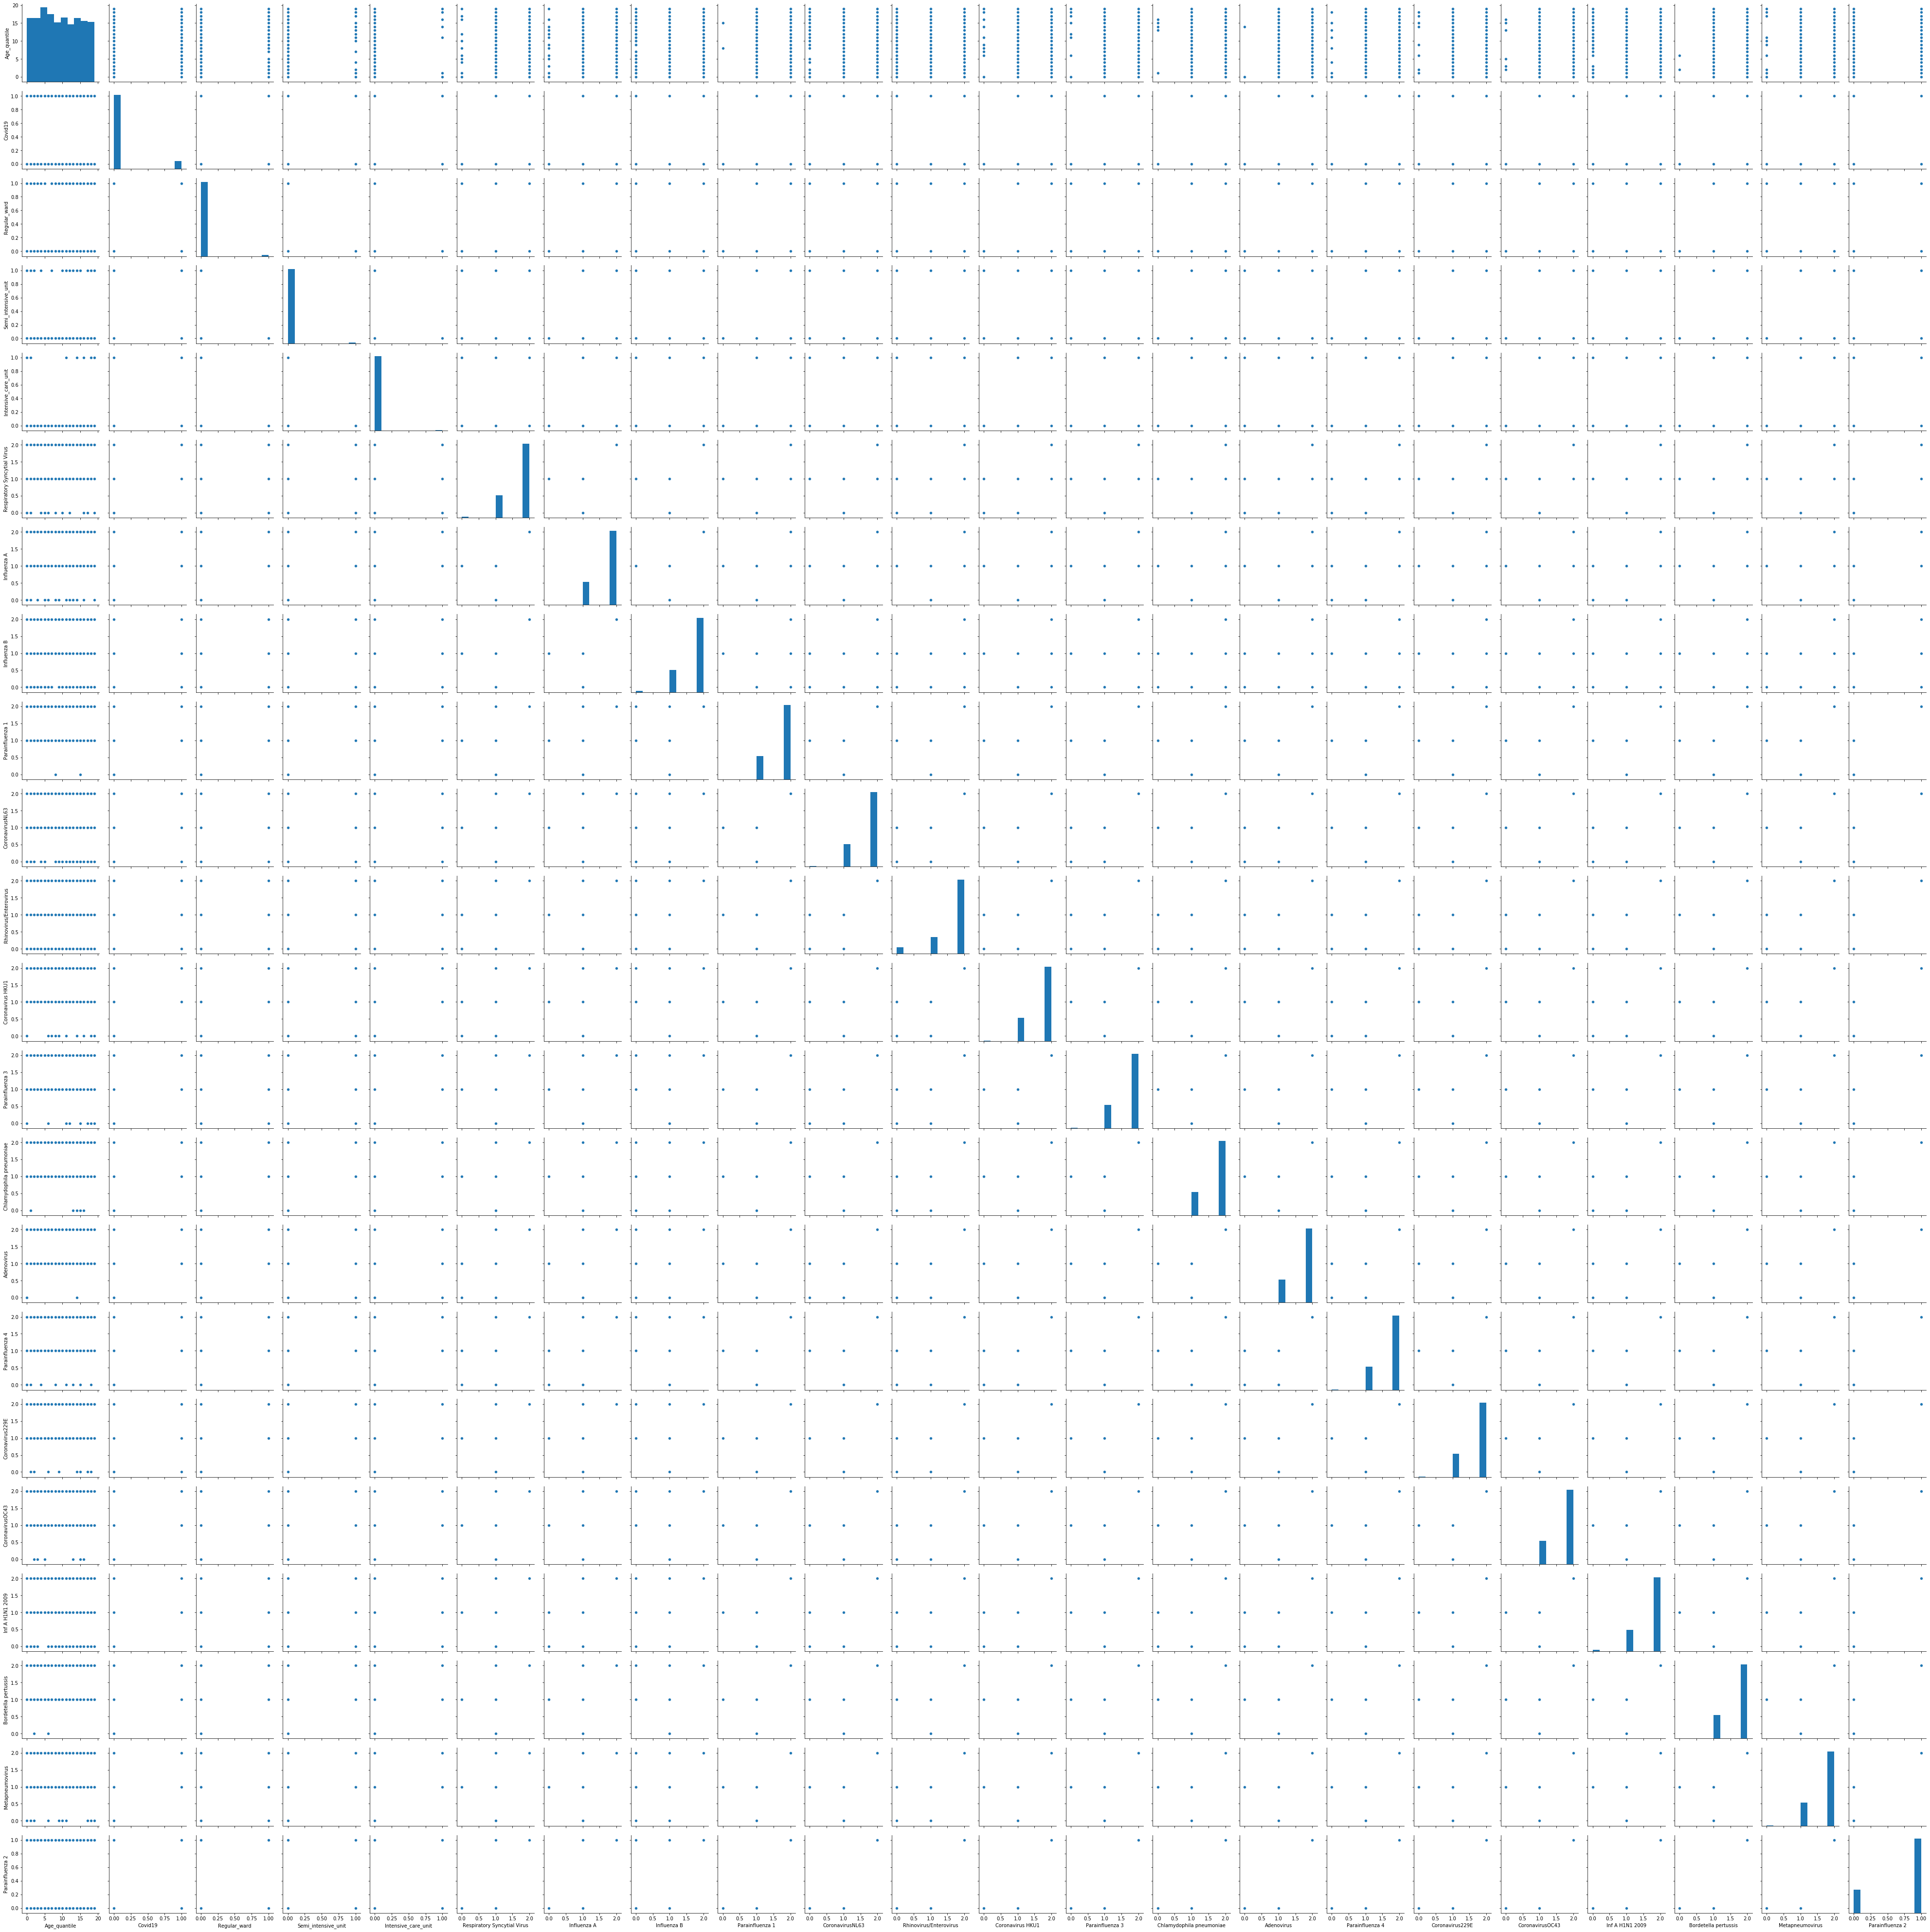

In [184]:
plt.figure()
sns.pairplot(df)

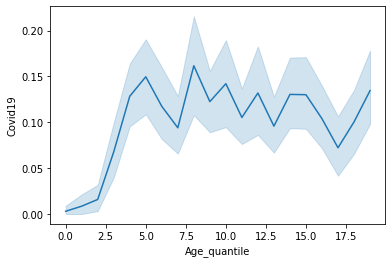

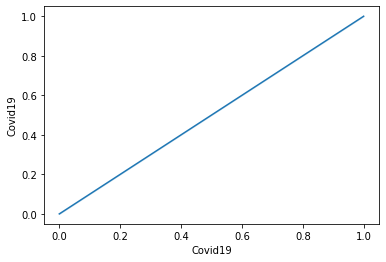

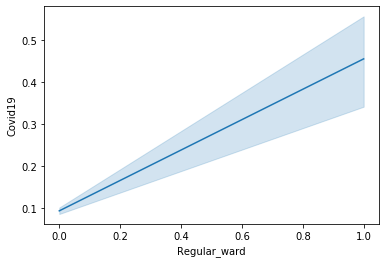

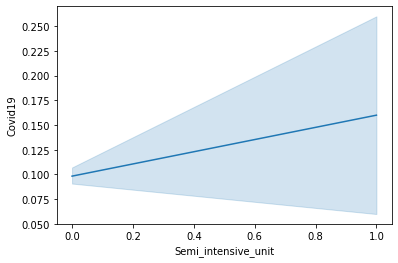

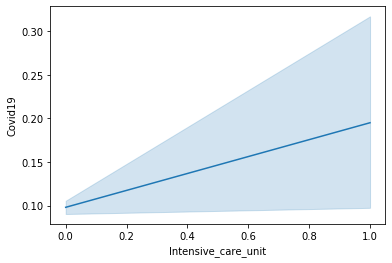

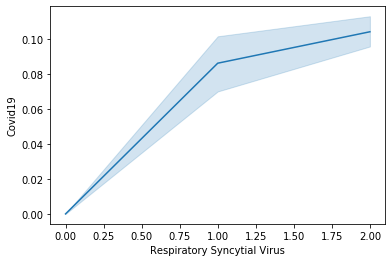

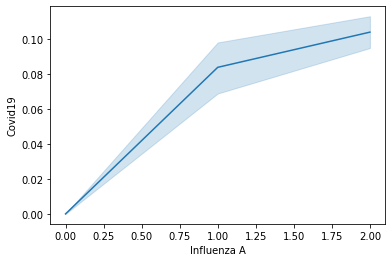

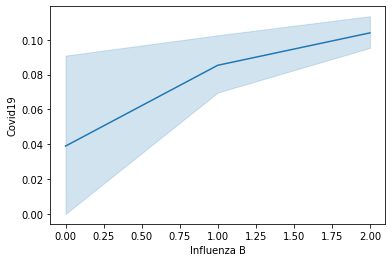

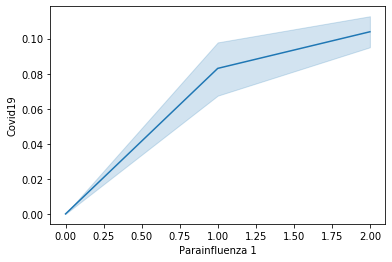

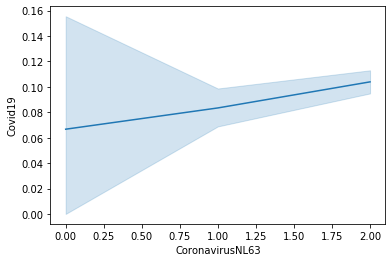

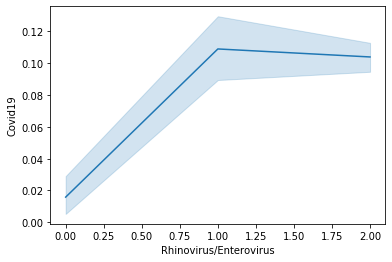

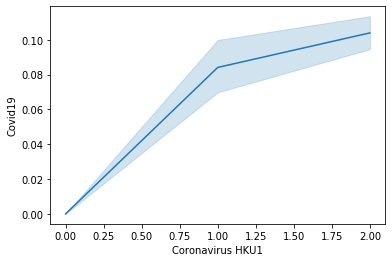

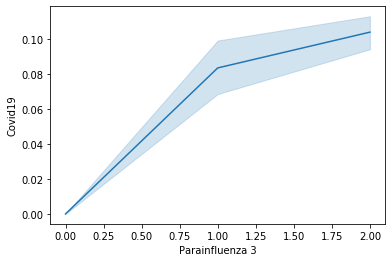

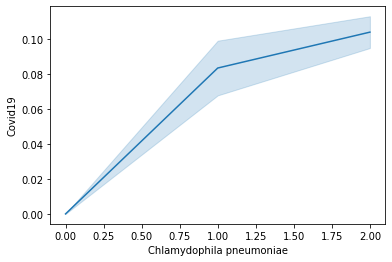

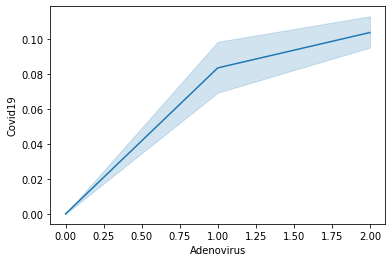

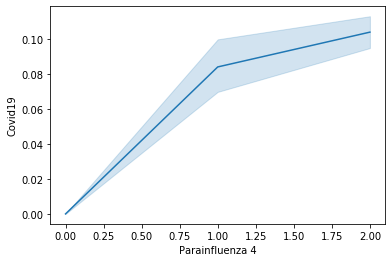

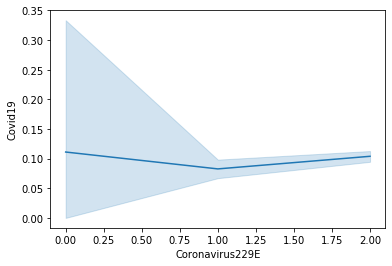

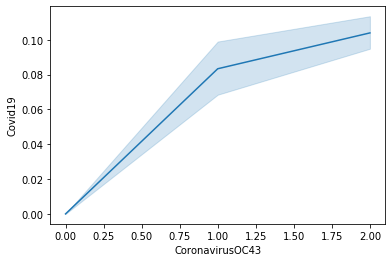

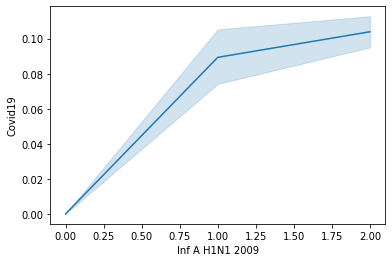

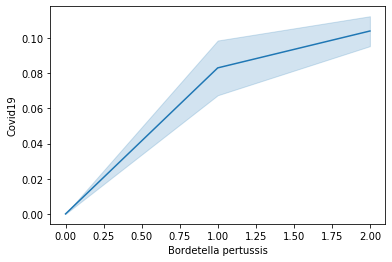

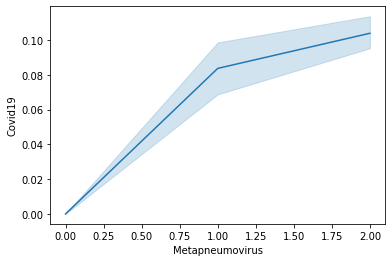

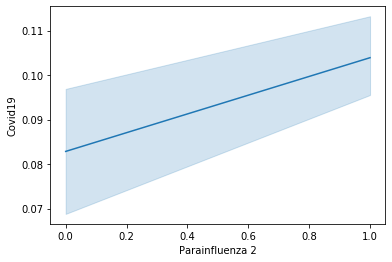

In [185]:
for i in df.columns:
    plt.figure()
    sns.lineplot(i,'Covid19',data=df)

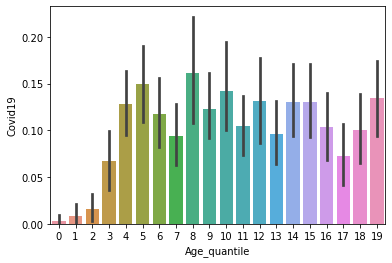

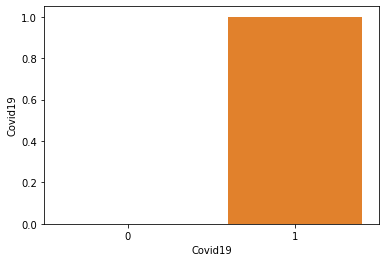

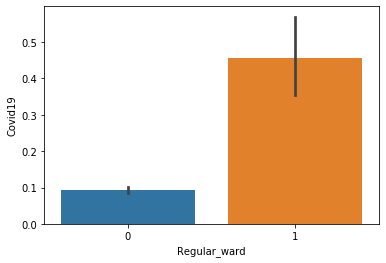

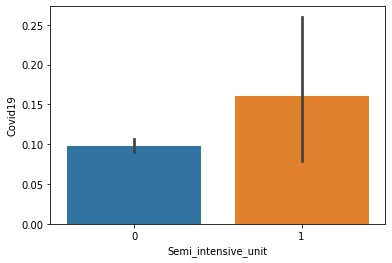

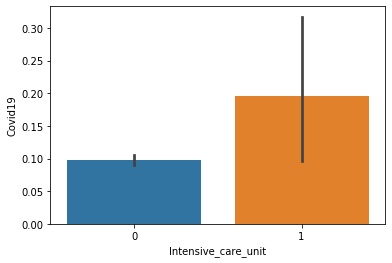

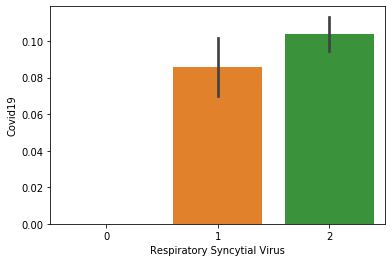

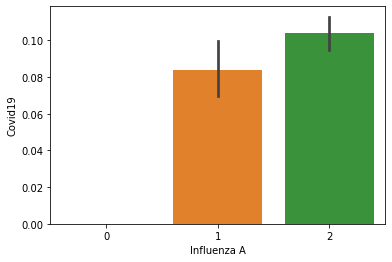

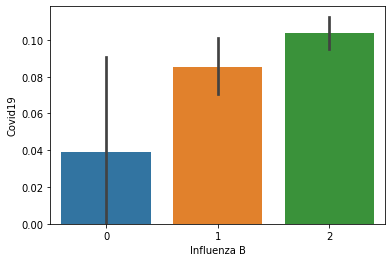

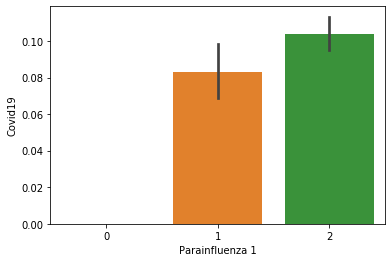

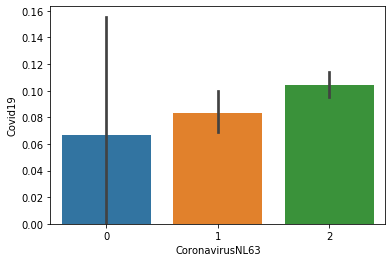

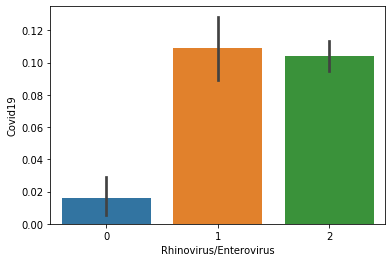

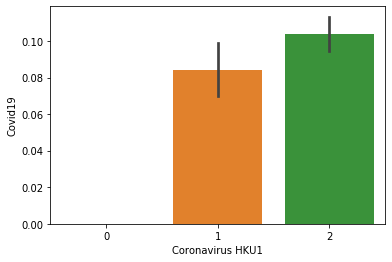

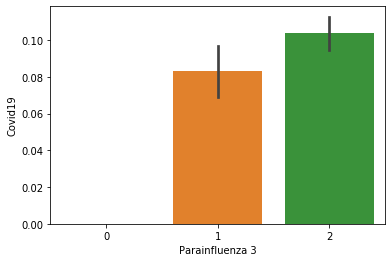

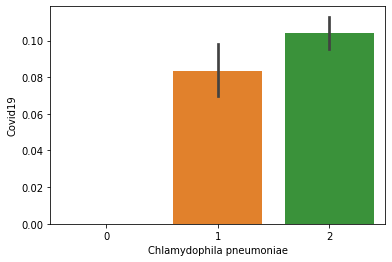

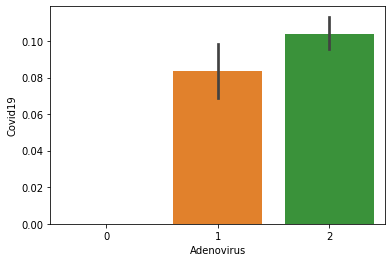

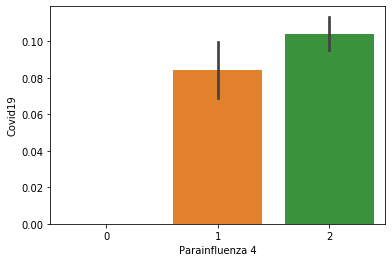

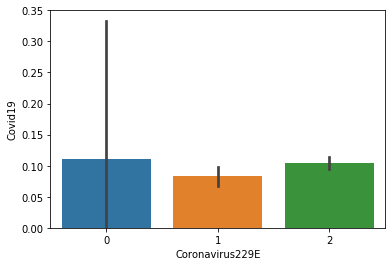

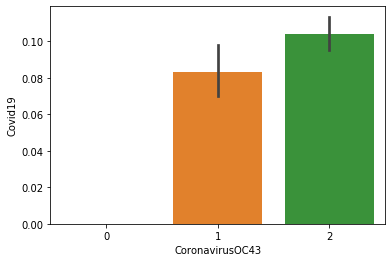

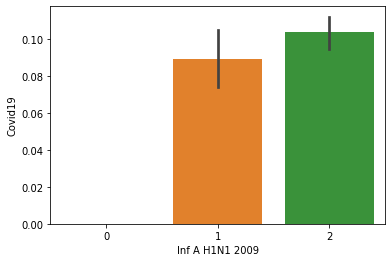

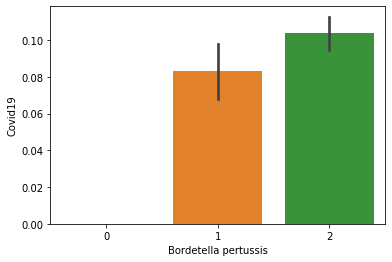

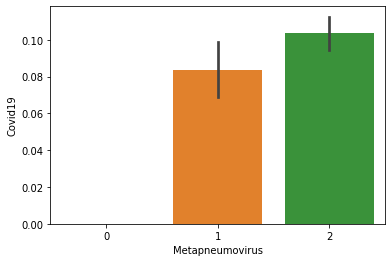

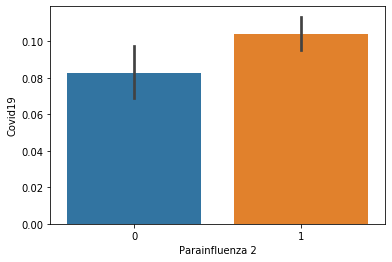

In [186]:
for i in df.columns:
    plt.figure()
    sns.barplot(i,'Covid19',data=df)

Chances of covid positive increases with increase in age quantile with highest chance at quantile 8. Majority of covid patients were admitted to regular ward, then intensive care unit and lastly semi intesive unit.Respiratory Syncytial virus=1 has a higher chance of covid 19 infection. Influenza A affected people have a higher chance of covid 19 infection than non affected people.Influenza B affected people have a higher chance of covid 19 infection than non affected people.ParaInfluenza 1 affected people have a higher chance of covid 19 infection than non affected people.CoronavirusNL63 affected people have a higher chance of covid 19 infection than non affected people.Rhinovirus/Enterovirus affected people have a higher chance of covid 19 infection than non affected people.Coronavirus HKU1 affected people have a higher chance of covid 19 infection than non affected people.ParaInfluenza 3 affected people have a higher chance of covid 19 infection than non affected people.Chlamydophilia pneumoniae affected people have a higher chance of covid 19 infection than non affected people.Adenovirus affected people have a higher chance of covid 19 infection than non affected people.ParaInfluenza 4 affected people have a higher chance of covid 19 infection than non affected people.Coronavirus229E affected people have a lower chance of covid 19 infection than non affected people.CoronavirusOC43 affected people have a higher chance of covid 19 infection than non affected people.INF A H1N1 2009 affected people have a higher chance of covid 19 infection than non affected people.Bordetella pertussis affected people have a higher chance of covid 19 infection than non affected people.Metapneumovirus affected people have a higher chance of covid 19 infection than non affected people.ParaInfluenza 2 affected people have a higher chance of covid 19 infection than non affected people.

In [187]:
#X y division of data
x=df.drop(['Covid19'],axis=1)
y=df['Covid19']
y=y.values.reshape(-1,1)
y.shape

(5644, 1)

In [188]:
#scaling the data
import sklearn
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
dx=scale.fit_transform(x)
x=pd.DataFrame(dx,columns=x.columns)
x

,Age_quantile,Regular_ward,Semi_intensive_unit,Intensive_care_unit,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,0.637244,-0.119146,-0.094542,-0.085542,0.549554,0.557136,0.544852,0.560441,0.550452,0.520697,...,0.558602,0.558860,0.557837,0.556345,0.558860,0.559120,0.540852,0.560710,0.557584,0.561253
1,1.329598,-0.119146,-0.094542,-0.085542,-1.656480,-1.734756,-1.604097,-1.773972,-1.673420,-2.874815,...,-1.756192,-1.758705,-1.748705,-1.733964,-1.758705,-1.761227,-1.564367,-1.776548,-1.746227,-1.781728
2,-0.228198,-0.119146,-0.094542,-0.085542,0.549554,0.557136,0.544852,0.560441,0.550452,0.520697,...,0.558602,0.558860,0.557837,0.556345,0.558860,0.559120,0.540852,0.560710,0.557584,0.561253
3,-0.747464,-0.119146,-0.094542,-0.085542,0.549554,0.557136,0.544852,0.560441,0.550452,0.520697,...,0.558602,0.558860,0.557837,0.556345,0.558860,0.559120,0.540852,0.560710,0.557584,0.561253
4,0.983421,-0.119146,-0.094542,-0.085542,-1.656480,-1.734756,-1.604097,-1.773972,-1.673420,-2.874815,...,-1.756192,-1.758705,-1.748705,-1.733964,-1.758705,-1.761227,-1.564367,-1.776548,-1.746227,-1.781728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,-1.093641,-0.119146,-0.094542,-0.085542,0.549554,0.557136,0.544852,0.560441,0.550452,0.520697,...,0.558602,0.558860,0.557837,0.556345,0.558860,0.559120,0.540852,0.560710,0.557584,0.561253
5640,1.329598,-0.119146,-0.094542,-0.085542,0.549554,0.557136,0.544852,0.560441,0.550452,0.520697,...,0.558602,0.558860,0.557837,0.556345,0.558860,0.559120,0.540852,0.560710,0.557584,0.561253
5641,-0.920552,-0.119146,-0.094542,-0.085542,0.549554,0.557136,0.544852,0.560441,0.550452,0.520697,...,0.558602,0.558860,0.557837,0.556345,0.558860,0.559120,0.540852,0.560710,0.557584,0.561253
5642,0.117979,-0.119146,-0.094542,-0.085542,0.549554,0.557136,0.544852,0.560441,0.550452,0.520697,...,0.558602,0.558860,0.557837,0.556345,0.558860,0.559120,0.540852,0.560710,0.557584,0.561253


In [189]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import cross_val_score

In [190]:
# getting the best random state for train test split
def max_score(model):
    max_score=0
    for r_state in range(42,100):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=r_state,test_size=0.20)
        model.fit(xtrain,ytrain)
        ypred=model.predict(xtest)
        accuracy=accuracy_score(ytest,ypred)
        if accuracy>max_score:
            max_score=accuracy
            final_r_state=r_state
    print(max_score,'is max accuracy against r_state',final_r_state)

In [191]:
logr=LogisticRegression()
max_score(logr)

0.9264836138175376 is max accuracy against r_state 70


In [82]:
#finding best parameters for knn
algo=KNeighborsClassifier()
para={'n_neighbors':[3,5,7,9,11]}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x,y)

print(grid.best_params_)

{'n_neighbors': 5}


In [83]:
knc=KNeighborsClassifier(n_neighbors=5)
max_score(knc)

0.9193976970770593 is max accuracy against r_state 96


In [84]:
algo=SVC()
para={'kernel':['rbf','poly','linear'],'C':[1,10]}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x,y)

print(grid.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [85]:
svc=SVC(kernel='rbf',C=10)
max_score(svc)

0.9264836138175376 is max accuracy against r_state 70


In [86]:
algo=DecisionTreeClassifier()
para={'criterion':['gini','entropy']}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x,y)

print(grid.best_params_)

{'criterion': 'entropy'}


In [87]:
dtc=DecisionTreeClassifier(criterion='entropy')
max_score(dtc)

0.9247121346324181 is max accuracy against r_state 70


In [88]:
algo=RandomForestClassifier()
para={'n_estimators':[50,100,150,200,500]}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x,y)

print(grid.best_params_)

{'n_estimators': 50}


In [89]:
rfc=RandomForestClassifier(n_estimators=50)
max_score(rfc)

0.9238263950398583 is max accuracy against r_state 70


In [90]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [91]:
algo=AdaBoostClassifier()
para={'n_estimators':[50,100,150,200,500],'base_estimator':[svc,logr,knc,dtc,rfc]}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x,y)

print(grid.best_params_)

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'n_estimators': 50}


In [92]:
ad=AdaBoostClassifier(n_estimators=50,base_estimator=dtc)
max_score(ad)

0.9255978742249779 is max accuracy against r_state 70


In [93]:
algo=GradientBoostingClassifier()
para={'learning_rate':[10,1,0.1,0.01,0.001]}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x,y)

print(grid.best_params_)

{'learning_rate': 0.1}


In [94]:
gdb=GradientBoostingClassifier(learning_rate=0.1)
max_score(gdb)

0.9247121346324181 is max accuracy against r_state 70


In [98]:
models=[]
models.append(('Logistic Regression',logr,70))
models.append(('Support Vector Classifier',svc,70))
models.append(('KNeighborsClassifier',knc,96))
models.append(('Decision tree Classifier',dtc,70))
models.append(('RandomForest Classifier',rfc,70))
models.append(('AdaBoost Classifier',ad,70))
models.append(('Gradient Boosting Classifier',gdb,70))

Models=[]
Accuracy=[]
Cvs=[]
Roc_score=[]

*********** Logistic Regression ************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy score= 0.9264836138175376


Cross Validation Score= 0.8975877730245181


              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1044
           1       0.62      0.06      0.11        85

    accuracy                           0.93      1129
   macro avg       0.78      0.53      0.53      1129
weighted avg       0.91      0.93      0.90      1129



[[1041    3]
 [  80    5]]
Roc score= 0.5279749830966869


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** Support Vector Classifier ************


SVC(C=10, break_ties=False, cache_size=200, class_weight

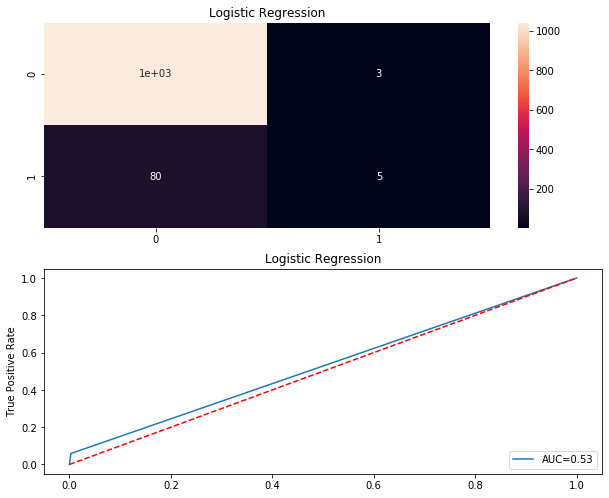

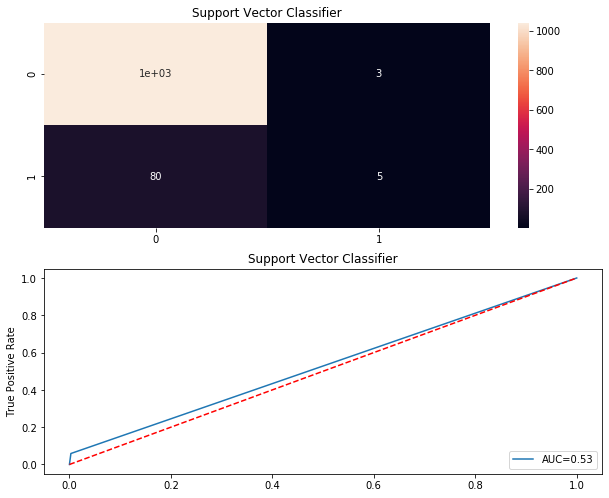

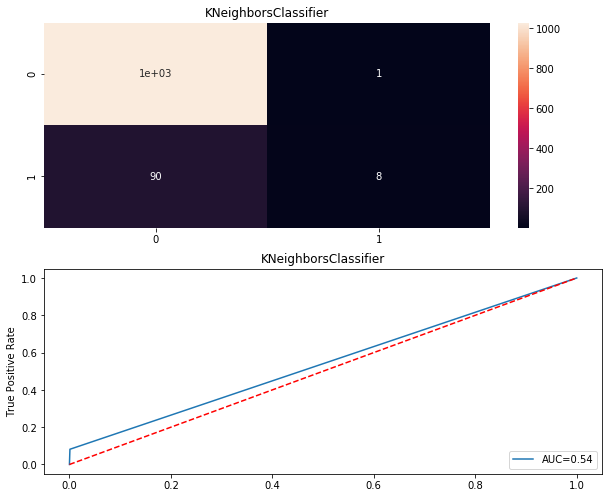

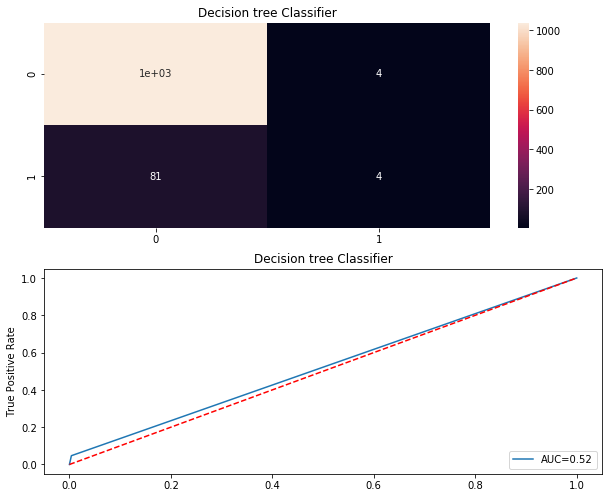

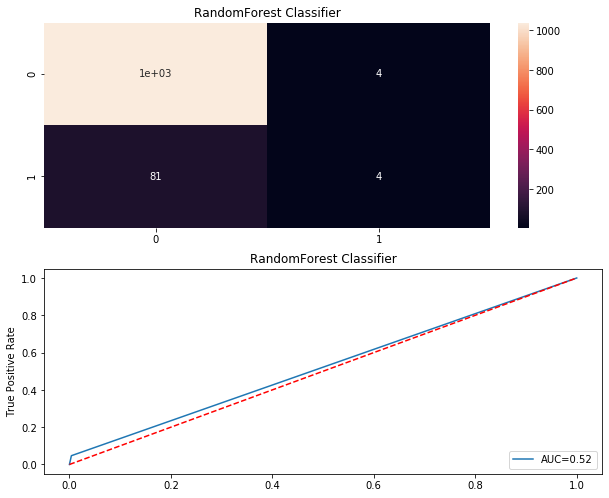

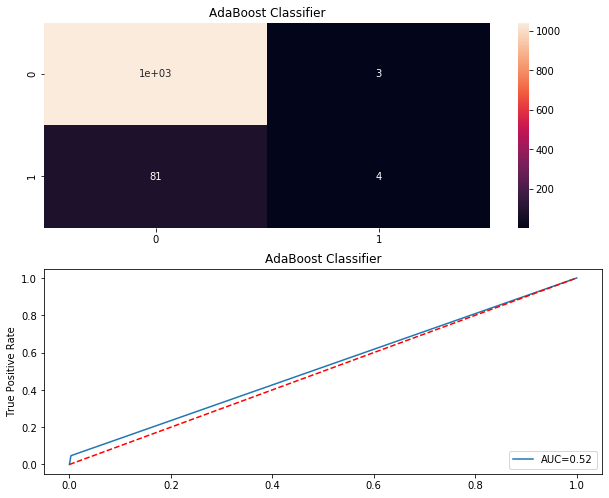

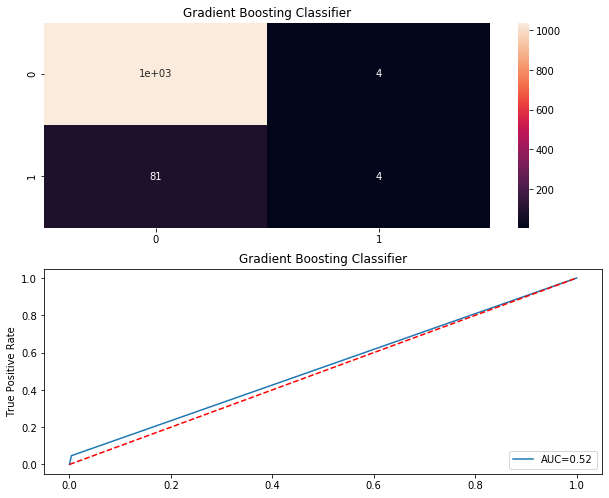

In [99]:
for name,model,randomstate in models:
    print('***********',name,'************')
    print('\n')
    Models.append(name)
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=randomstate,test_size=0.20)
    model.fit(xtrain,ytrain)
    print(model)
    pred=model.predict(xtest)
    print('\n')
    Ac=accuracy_score(ytest,pred)
    print('Accuracy score=',Ac)
    Accuracy.append(Ac*100)
    print('\n')
    cvs=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross Validation Score=',cvs)
    Cvs.append(cvs)
    print('\n')
    Cr=classification_report(ytest,pred)
    print(Cr)
    print('\n')
    cm=confusion_matrix(ytest,pred)
    print(cm)
    fpr,tpr,threshold=roc_curve(ytest,pred)
    roc_auc=auc(fpr,tpr)
    print('Roc score=',roc_auc)
    Roc_score.append(roc_auc)
    print('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    
    print('\n\n')

In [100]:
Result=pd.DataFrame({'Models':Models,'Accuracy':Accuracy,'Cross Validation Score':Cvs,'Roc_Score':Roc_score})
Result

,Models,Accuracy,Cross Validation Score,Roc_Score
0,Logistic Regression,92.648361,0.897588,0.527975
1,Support Vector Classifier,92.648361,0.901132,0.527975
2,KNeighborsClassifier,91.939770,0.899891,0.540331
3,Decision tree Classifier,92.471213,0.899715,0.521614
4,RandomForest Classifier,92.471213,0.900601,0.521614
5,AdaBoost Classifier,92.559787,0.899537,0.522093
6,Gradient Boosting Classifier,92.471213,0.901663,0.521614


svc is the best model

In [101]:
#saving the model
from sklearn.externals import joblib
joblib.dump(svc,'svc.brazil-covid.obj')

['svc.brazil-covid.obj']

Prediction of admission to unit

In [192]:
df1=df

In [193]:
df1

,Age_quantile,Covid19,Regular_ward,Semi_intensive_unit,Intensive_care_unit,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
1,17,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2,8,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
3,5,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
4,15,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
5640,17,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
5641,4,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
5642,10,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1


A new variable is created where regular ward=1, semi intensive unit=2 and intensive care unit =3. no admissions are assigned 0.

In [194]:
conditions=[
    (df1['Regular_ward']==1),
    (df1['Semi_intensive_unit']==1),
    (df1['Intensive_care_unit']==1),
    (df1['Regular_ward']==0)&(df1['Semi_intensive_unit']==0)&(df1['Intensive_care_unit']==0)
]
values=[1,2,3,0]
df1['Unit']=np.select(conditions,values)

In [195]:
df1

,Age_quantile,Covid19,Regular_ward,Semi_intensive_unit,Intensive_care_unit,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,...,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Unit
0,13,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,0
1,17,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
2,8,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,0
3,5,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,0
4,15,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,0
5640,17,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,0
5641,4,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,0
5642,10,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,0


In [196]:
df1['Unit'].value_counts()

0    5474
1      79
2      50
3      41
Name: Unit, dtype: int64

In [197]:
df1['Regular_ward'].value_counts()

0    5565
1      79
Name: Regular_ward, dtype: int64

In [198]:
df1['Semi_intensive_unit'].value_counts()

0    5594
1      50
Name: Semi_intensive_unit, dtype: int64

In [199]:
df1['Intensive_care_unit'].value_counts()

0    5603
1      41
Name: Intensive_care_unit, dtype: int64

In [200]:
df1.drop(['Regular_ward'],axis=1,inplace=True)
df1.drop(['Semi_intensive_unit'],axis=1,inplace=True)
df1.drop(['Intensive_care_unit'],axis=1,inplace=True)

EDA

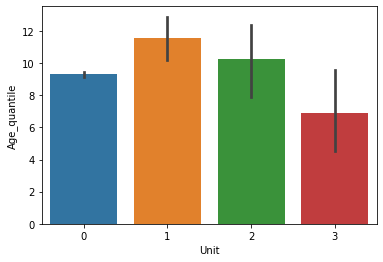

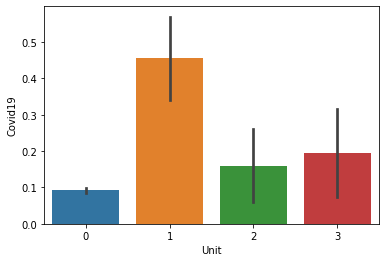

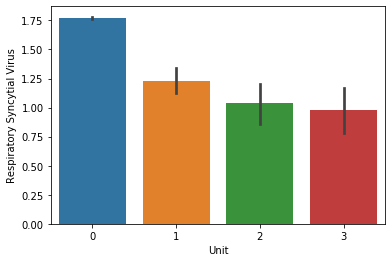

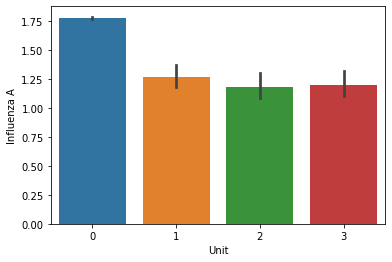

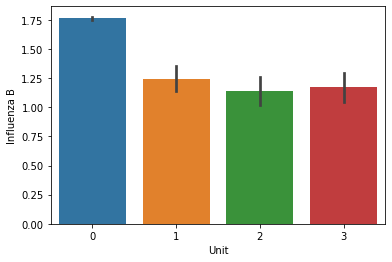

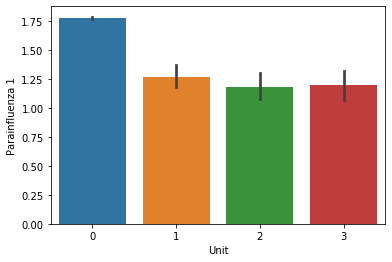

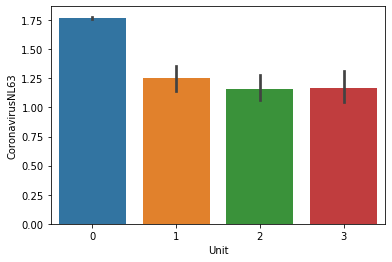

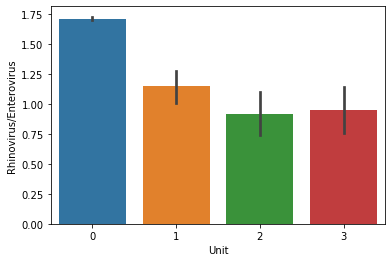

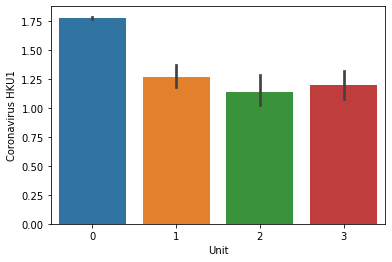

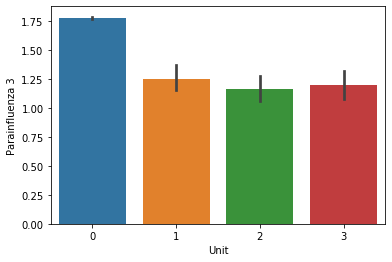

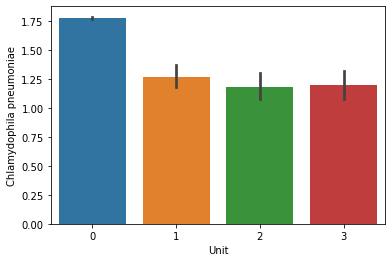

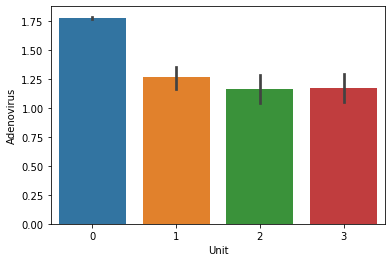

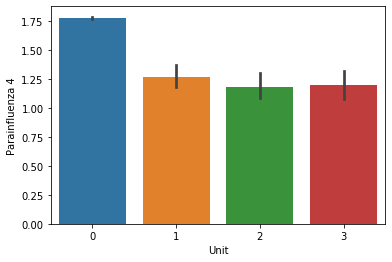

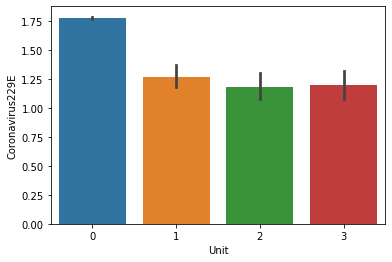

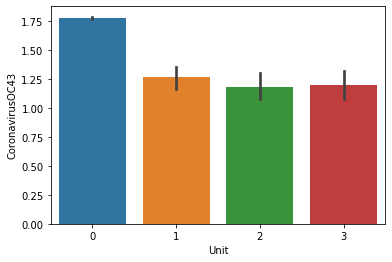

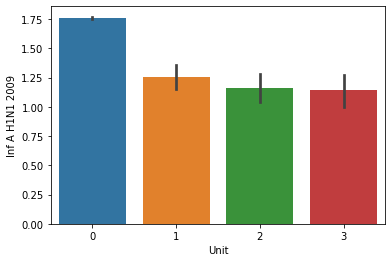

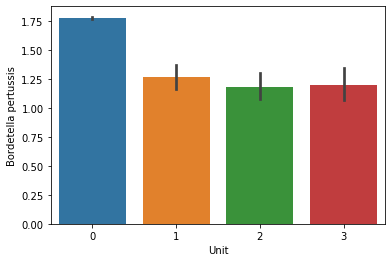

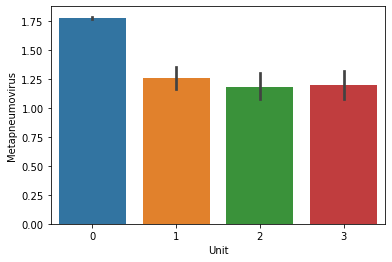

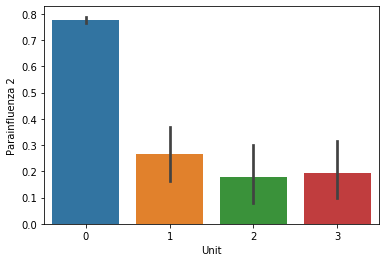

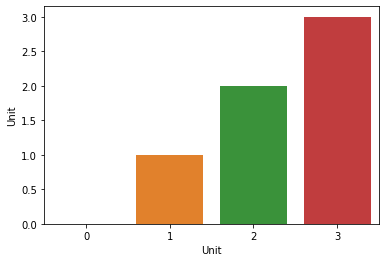

In [201]:
for i in df1.columns:
    plt.figure()
    sns.barplot('Unit',i,data=df)

Unit 1 has the highest number of Covid positive patients but depending on severity of the disease more are admitted to intensive care unit.Most intensive patients of Respiratory syncytial virus are admitted to regular ward and lowest to intensive care unit.Most intensive patients of Influenza A are admitted to regular ward and lowest to semi intensive unit.Most intensive patients of Influenza B are admitted to regular ward and lowest to semi intensive unit.Most intensive patients of Parainfluenza 1 are admitted to regular ward and lowest to semi intensive unit.Most intensive patients of CoronavirusNL63 are admitted to regular ward and lowest to semi intensive unit.Most intensive patients of Rhinovirus/Enterovirus are admitted to regular ward and lowest to semi intensive unit.Most intensive patients of Coronavirus HKU1 are admitted to regular ward and lowest to semi intensive unit.Most intensive patients of Parainfluenza 3 are admitted to regular ward and lowest to semi intensive unit.Most intensive patients of Chlamydophilia pneumoniae are admitted to regular ward and lowest to semi intensive unit.Most intensive patients of Adenovirus are admitted to regular ward and lowest to semi intensive unit.Most intensive patients of Parainfluenza 4 are admitted to regular ward and lowest to semi intensive unit.Most intensive patients of Coronavirus229E are admitted to regular ward and lowest to semi intensive unit.Most intensive patients of CoronavirusOC43 are admitted to regular ward and lowest to semi intensive unit.Most intensive patients of INF A H1N1 2009 are admitted to regular ward and lowest to intensive care unit.Most intensive patients of Bordetella pertussis are admitted to regular ward and lowest to semi intensive unit.Most intensive patients of Metapneumovirus are admitted to regular ward and lowest to semi intensive unit.Most intensive patients of Parainfluenza 2 are admitted to regular ward and lowest to semi intensive unit.

In [202]:
#X y division of data
x1=df1.drop(['Unit'],axis=1)
y1=df1['Unit']
y1=y1.values.reshape(-1,1)
y1.shape

(5644, 1)

In [203]:
#scaling the data
import sklearn
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
dx1=scale.fit_transform(x1)
x1=pd.DataFrame(dx1,columns=x1.columns)
x1

,Age_quantile,Covid19,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,0.637244,-0.331229,0.549554,0.557136,0.544852,0.560441,0.550452,0.520697,0.556102,0.558602,0.558860,0.557837,0.556345,0.558860,0.559120,0.540852,0.560710,0.557584,0.561253
1,1.329598,-0.331229,-1.656480,-1.734756,-1.604097,-1.773972,-1.673420,-2.874815,-1.731536,-1.756192,-1.758705,-1.748705,-1.733964,-1.758705,-1.761227,-1.564367,-1.776548,-1.746227,-1.781728
2,-0.228198,-0.331229,0.549554,0.557136,0.544852,0.560441,0.550452,0.520697,0.556102,0.558602,0.558860,0.557837,0.556345,0.558860,0.559120,0.540852,0.560710,0.557584,0.561253
3,-0.747464,-0.331229,0.549554,0.557136,0.544852,0.560441,0.550452,0.520697,0.556102,0.558602,0.558860,0.557837,0.556345,0.558860,0.559120,0.540852,0.560710,0.557584,0.561253
4,0.983421,-0.331229,-1.656480,-1.734756,-1.604097,-1.773972,-1.673420,-2.874815,-1.731536,-1.756192,-1.758705,-1.748705,-1.733964,-1.758705,-1.761227,-1.564367,-1.776548,-1.746227,-1.781728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,-1.093641,3.019055,0.549554,0.557136,0.544852,0.560441,0.550452,0.520697,0.556102,0.558602,0.558860,0.557837,0.556345,0.558860,0.559120,0.540852,0.560710,0.557584,0.561253
5640,1.329598,-0.331229,0.549554,0.557136,0.544852,0.560441,0.550452,0.520697,0.556102,0.558602,0.558860,0.557837,0.556345,0.558860,0.559120,0.540852,0.560710,0.557584,0.561253
5641,-0.920552,-0.331229,0.549554,0.557136,0.544852,0.560441,0.550452,0.520697,0.556102,0.558602,0.558860,0.557837,0.556345,0.558860,0.559120,0.540852,0.560710,0.557584,0.561253
5642,0.117979,-0.331229,0.549554,0.557136,0.544852,0.560441,0.550452,0.520697,0.556102,0.558602,0.558860,0.557837,0.556345,0.558860,0.559120,0.540852,0.560710,0.557584,0.561253


In [204]:
# getting the best random state for train test split
def max_score2(model):
    max_score=0
    for r_state in range(42,100):
        xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,random_state=r_state,test_size=0.20)
        model.fit(xtrain,ytrain)
        ypred=model.predict(xtest)
        accuracy=accuracy_score(ytest,ypred)
        if accuracy>max_score:
            max_score=accuracy
            final_r_state=r_state
    print(max_score,'is max accuracy against r_state',final_r_state)

In [205]:
logr2=LogisticRegression()
max_score2(logr2)

0.9796279893711249 is max accuracy against r_state 96


In [141]:
#finding best parameters for knn
algo=KNeighborsClassifier()
para={'n_neighbors':[3,5,7,9,11]}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x1,y1)

print(grid.best_params_)

{'n_neighbors': 7}


In [142]:
knc2=KNeighborsClassifier(n_neighbors=7)
max_score2(knc2)

0.9796279893711249 is max accuracy against r_state 96


In [143]:
algo=SVC()
para={'kernel':['rbf','poly','linear'],'C':[1,10]}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x1,y1)

print(grid.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [144]:
svc2=SVC(kernel='rbf',C=1)
max_score2(svc2)

0.9796279893711249 is max accuracy against r_state 96


In [145]:
algo=DecisionTreeClassifier()
para={'criterion':['gini','entropy']}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x1,y1)

print(grid.best_params_)

{'criterion': 'gini'}


In [146]:
dtc2=DecisionTreeClassifier(criterion='gini')
max_score2(dtc2)

0.978742249778565 is max accuracy against r_state 96


In [147]:
algo=RandomForestClassifier()
para={'n_estimators':[50,100,150,200,500]}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x1,y1)

print(grid.best_params_)

{'n_estimators': 200}


In [148]:
rfc2=RandomForestClassifier(n_estimators=200)
max_score2(rfc2)

0.978742249778565 is max accuracy against r_state 96


In [151]:
algo=GradientBoostingClassifier()
para={'learning_rate':[10,1,0.1,0.01,0.001]}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x1,y1)

print(grid.best_params_)

{'learning_rate': 0.001}


In [152]:
gdb2=GradientBoostingClassifier(learning_rate=0.001)
max_score2(gdb2)

0.9796279893711249 is max accuracy against r_state 96


In [153]:
models2=[]
models2.append(('Logistic Regression',logr2,96))
models2.append(('Support Vector Classifier',svc2,96))
models2.append(('KNeighborsClassifier',knc2,96))
models2.append(('Decision tree Classifier',dtc2,96))
models2.append(('RandomForest Classifier',rfc2,96))
models2.append(('Gradient Boosting Classifier',gdb2,96))

Models2=[]
Accuracy2=[]
Cvs2=[]

In [154]:
for name,model,randomstate in models2:
    print('***********',name,'************')
    print('\n')
    Models2.append(name)
    xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,random_state=randomstate,test_size=0.20)
    model.fit(xtrain,ytrain)
    print(model)
    pred=model.predict(xtest)
    print('\n')
    Ac=accuracy_score(ytest,pred)
    print('Accuracy score=',Ac)
    Accuracy2.append(Ac*100)
    print('\n')
    cvs=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross Validation Score=',cvs)
    Cvs2.append(cvs)
    print('\n')
    Cr=classification_report(ytest,pred)
    print(Cr)
    print('\n')
    cm=confusion_matrix(ytest,pred)
    print(cm)

*********** Logistic Regression ************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy score= 0.9796279893711249


Cross Validation Score= 0.9698795142880474


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1106
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         6

    accuracy                           0.98      1129
   macro avg       0.24      0.25      0.25      1129
weighted avg       0.96      0.98      0.97      1129



[[1106    0    0    0]
 [  12    0    0    0]
 [   5    0    0    0]
 [   6    0    0    0]]
*********** S

In [155]:
Result2=pd.DataFrame({'Models':Models2,'Accuracy':Accuracy2,'Cross Validation Score':Cvs2})
Result2

,Models,Accuracy,Cross Validation Score
0,Logistic Regression,97.962799,0.969880
1,Support Vector Classifier,97.962799,0.969880
2,KNeighborsClassifier,97.962799,0.969348
3,Decision tree Classifier,97.874225,0.967576
4,RandomForest Classifier,97.874225,0.967575
5,Gradient Boosting Classifier,97.962799,0.969880


SVC is the best model

In [156]:
#saving the model
from sklearn.externals import joblib
joblib.dump(svc2,'svc.brazil_covid_units.obj')

['svc.brazil_covid_units.obj']

In [158]:
df1

,Age_quantile,Covid19,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
1,17,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0
2,8,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
3,5,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
4,15,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
5640,17,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
5641,4,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
5642,10,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
